In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

### graphing the unemployment time-series

In [172]:
us_rates = pd.read_csv('data/UNRATE.csv')

In [173]:
us_rates.columns = us_rates.columns.str.lower()

In [174]:
us_rates.loc[:, 'date'] = us_rates.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [175]:
us_rates = us_rates.query('date>=2000').reset_index(drop=True)

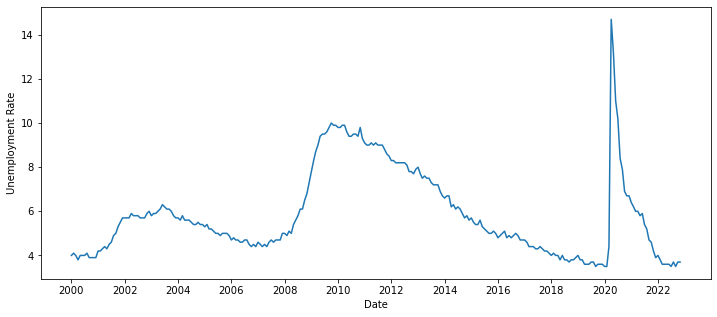

In [6]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=us_rates, x='date', y='unrate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

<AxesSubplot:xlabel='unrate'>

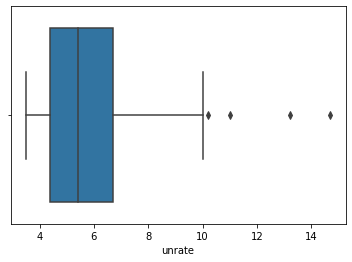

In [202]:
sns.boxplot(x=us_rates['unrate'])

### creating the ARIMA model and forecasting unemployment for 2020-01 to 2022-09

In [7]:
train = us_rates.query('date<2020')
test = us_rates.query('date>=2020')
y_train = train['unrate']
y_test = test['unrate']

In [8]:
y_train.index = train.date
y_test.index = test.date

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(us_rates['unrate'].dropna())
print('ADF Statistic: %f' % result[0]) # ADF Statistic: -2.884310
print('p-value: %f' % result[1]) # p-value: 0.047203

ADF Statistic: -2.884310
p-value: 0.047203


In [71]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(us_rates['unrate'], start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=10,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)
smodel.summary()
# Best model:  ARIMA(2,0,1)(2,1,1)[10]

Performing stepwise search to minimize aic


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,1,1)[10] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=1055.615, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=664.259, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=826.994, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=1053.630, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[10] intercept   : AIC=725.651, Time=0.07 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,1,0)[10] intercept   : AIC=636.729, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[10] intercept   : AIC=584.155, Time=0.74 sec
 ARIMA(1,0,0)(1,1,1)[10] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(2,1,2)[10] intercept   : AIC=585.095, Time=1.43 sec
 ARIMA(1,0,0)(1,1,2)[10] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(2,1,1)[10] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(2,0,0)(2,1,1)[10] intercept   : AIC=585.334, Time=0.69 sec
 ARIMA(1,0,1)(2,1,1)[10] intercept   : AIC=585.155, Time=0.87 sec
 ARIMA(0,0,1)(2,1,1)[10] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(2,0,1)(2,1,1)[10] intercept   : AIC=584.069, Time=1.48 sec
 ARIMA(2,0,1)(1,1,1)[10] intercept   : AIC=inf, Time=0.59 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[10] intercept   : AIC=632.152, Time=1.04 sec
 ARIMA(2,0,1)(2,1,2)[10] intercept   : AIC=586.317, Time=2.54 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,0)[10] intercept   : AIC=655.193, Time=0.43 sec
 ARIMA(2,0,1)(1,1,2)[10] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(3,0,1)(2,1,1)[10] intercept   : AIC=585.892, Time=2.42 sec
 ARIMA(2,0,2)(2,1,1)[10] intercept   : AIC=585.876, Time=2.23 sec
 ARIMA(1,0,2)(2,1,1)[10] intercept   : AIC=584.822, Time=1.32 sec
 ARIMA(3,0,0)(2,1,1)[10] intercept   : AIC=585.344, Time=1.77 sec
 ARIMA(3,0,2)(2,1,1)[10] intercept   : AIC=586.731, Time=2.69 sec
 ARIMA(2,0,1)(2,1,1)[10]             : AIC=582.081, Time=1.04 sec
 ARIMA(2,0,1)(1,1,1)[10]             : AIC=inf, Time=0.54 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[10]             : AIC=630.172, Time=0.67 sec
 ARIMA(2,0,1)(2,1,2)[10]             : AIC=583.161, Time=2.17 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,0)[10]             : AIC=653.196, Time=0.32 sec
 ARIMA(2,0,1)(1,1,2)[10]             : AIC=inf, Time=0.85 sec
 ARIMA(1,0,1)(2,1,1)[10]             : AIC=583.166, Time=0.56 sec
 ARIMA(2,0,0)(2,1,1)[10]             : AIC=583.346, Time=0.62 sec
 ARIMA(3,0,1)(2,1,1)[10]             : AIC=583.903, Time=1.41 sec
 ARIMA(2,0,2)(2,1,1)[10]             : AIC=583.887, Time=1.41 sec
 ARIMA(1,0,0)(2,1,1)[10]             : AIC=582.167, Time=0.53 sec
 ARIMA(1,0,2)(2,1,1)[10]             : AIC=582.832, Time=0.72 sec
 ARIMA(3,0,0)(2,1,1)[10]             : AIC=583.354, Time=1.13 sec
 ARIMA(3,0,2)(2,1,1)[10]             : AIC=584.692, Time=2.54 sec

Best model:  ARIMA(2,0,1)(2,1,1)[10]          
Total fit time: 40.603 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  275
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 10)   Log Likelihood                -284.040
Date:                            Mon, 19 Dec 2022   AIC                            582.081
Time:                                    14:32:03   BIC                            607.139
Sample:                                         0   HQIC                           592.149
                                            - 275                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2207      0.209      1.057      0.291      -0.189       0.630
ar.L2          0.6826      0.227      3.010      0.003       0.238       1.127
ma.L1          0.8113      0.204      3.971      0.000       0.411       1.212
ar.S.L10      -0.0376      0.077     -0.488      0.625      -0.189       0.113
ar.S.L20      -0.0638      0.079     -0.803      0.422      -0.220       0.092
ma.S.L10      -0.8855      0.066    -13.514      0.000      -1.014      -0.757
sigma2         0.4665      0.008     59.332      0.000       0.451       0.482
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            375018.54
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              70.50   Skew:                            12.32
Prob(H) (two-sided):                  0.00   Kurtosis:                       185.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

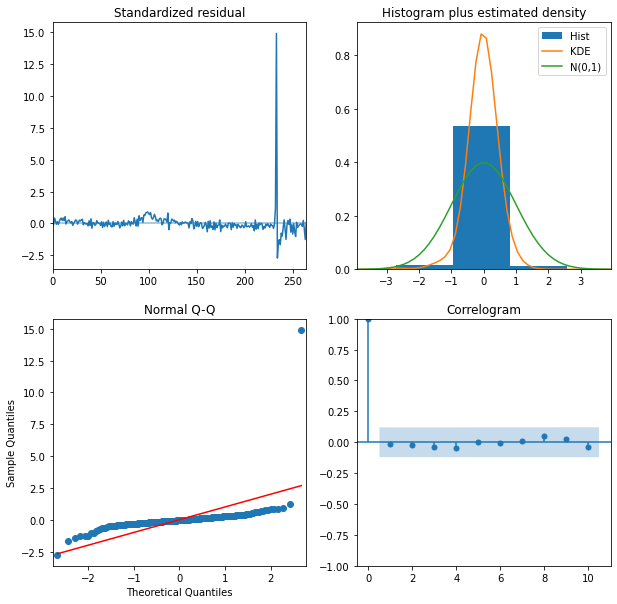

In [240]:
smodel.plot_diagnostics(figsize=(10, 10))
plt.show()

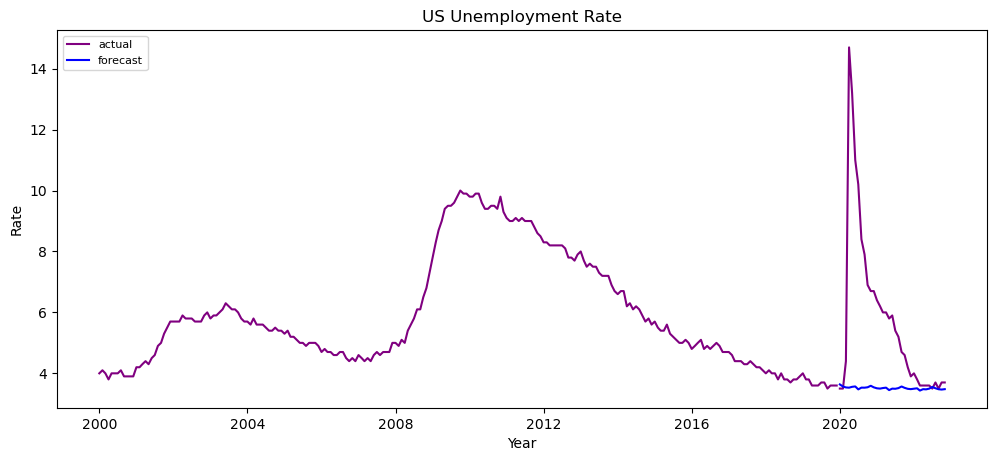

In [124]:
# building ARIMA model
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# forecasting the next 35 unemployment rates
normal_predicted, ci = smodel.predict(35, return_conf_int=True)  # 95% conf

normal_predicted.index = test.date
lower_bound = pd.Series(ci[:, 0], index=test.date)
upper_bound = pd.Series(ci[:, 1], index=test.date)

# plotting actual vs forecast
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, color='purple', label='actual')
plt.plot(y_test, color='purple')
plt.plot(normal_predicted, color='blue', label='forecast')
plt.title('US Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [183]:
import os  
os.makedirs('file:///Users/jamiepark/Dropbox/Mac/Desktop/projects/covid_unemployment/data')  
unemployment = us_rates.rename({'unrate': 'actual'}, axis=1)
temp = pd.concat([pd.DataFrame(y_train).rename({'unrate': 'predicted'}, axis=1), pd.DataFrame(normal_predicted).rename({0: 'predicted'}, axis=1)], axis=0)
unemployment.merge(temp, on='date').to_csv('unemployment.csv')

In [73]:
labor_market = pd.read_csv('data/FRBKCLMCILA.csv')
labor_market.columns = labor_market.columns.str.lower()

labor_market.loc[:, 'date'] = labor_market.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# merge
merged = pd.merge(us_rates, labor_market, on="date")

merged.index = merged['date']
merged.drop('date', axis=1, inplace=True)

In [78]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

sxmodel = pm.auto_arima(merged[['unrate']], exogenous=merged[['frbkclmcila']],
                        start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=10,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,1,1)[10] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=1055.615, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=664.259, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=826.994, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=1053.630, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[10] intercept   : AIC=725.651, Time=0.08 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,1,0)[10] intercept   : AIC=636.729, Time=0.35 sec
 ARIMA(1,0,0)(2,1,1)[10] intercept   : AIC=584.155, Time=0.77 sec
 ARIMA(1,0,0)(1,1,1)[10] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(2,1,2)[10] intercept   : AIC=585.095, Time=1.43 sec
 ARIMA(1,0,0)(1,1,2)[10] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(2,1,1)[10] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(2,0,0)(2,1,1)[10] intercept   : AIC=585.334, Time=0.65 sec
 ARIMA(1,0,1)(2,1,1)[10] intercept   : AIC=585.155, Time=0.80 sec
 ARIMA(0,0,1)(2,1,1)[10] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,1)(2,1,1)[10] intercept   : AIC=584.069, Time=1.40 sec
 ARIMA(2,0,1)(1,1,1)[10] intercept   : AIC=inf, Time=0.57 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[10] intercept   : AIC=632.152, Time=0.91 sec
 ARIMA(2,0,1)(2,1,2)[10] intercept   : AIC=586.317, Time=1.84 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,0)[10] intercept   : AIC=655.193, Time=0.48 sec
 ARIMA(2,0,1)(1,1,2)[10] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(3,0,1)(2,1,1)[10] intercept   : AIC=585.892, Time=2.19 sec
 ARIMA(2,0,2)(2,1,1)[10] intercept   : AIC=585.876, Time=2.20 sec
 ARIMA(1,0,2)(2,1,1)[10] intercept   : AIC=584.822, Time=1.39 sec
 ARIMA(3,0,0)(2,1,1)[10] intercept   : AIC=585.344, Time=1.81 sec
 ARIMA(3,0,2)(2,1,1)[10] intercept   : AIC=586.731, Time=2.72 sec
 ARIMA(2,0,1)(2,1,1)[10]             : AIC=582.081, Time=1.00 sec
 ARIMA(2,0,1)(1,1,1)[10]             : AIC=inf, Time=0.46 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,1,0)[10]             : AIC=630.172, Time=0.63 sec
 ARIMA(2,0,1)(2,1,2)[10]             : AIC=583.161, Time=1.83 sec


/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,0)[10]             : AIC=653.196, Time=0.30 sec
 ARIMA(2,0,1)(1,1,2)[10]             : AIC=inf, Time=0.77 sec
 ARIMA(1,0,1)(2,1,1)[10]             : AIC=583.166, Time=0.50 sec
 ARIMA(2,0,0)(2,1,1)[10]             : AIC=583.346, Time=0.57 sec
 ARIMA(3,0,1)(2,1,1)[10]             : AIC=583.903, Time=1.46 sec
 ARIMA(2,0,2)(2,1,1)[10]             : AIC=583.887, Time=1.29 sec
 ARIMA(1,0,0)(2,1,1)[10]             : AIC=582.167, Time=0.50 sec
 ARIMA(1,0,2)(2,1,1)[10]             : AIC=582.832, Time=0.69 sec
 ARIMA(3,0,0)(2,1,1)[10]             : AIC=583.354, Time=0.81 sec
 ARIMA(3,0,2)(2,1,1)[10]             : AIC=584.692, Time=2.26 sec

Best model:  ARIMA(2,0,1)(2,1,1)[10]          
Total fit time: 37.933 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  275
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 10)   Log Likelihood                -284.040
Date:                            Mon, 19 Dec 2022   AIC                            582.081
Time:                                    14:44:59   BIC                            607.139
Sample:                                01-01-2000   HQIC                           592.149
                                     - 11-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2207      0.209      1.057      0.291      -0.189       0.630
ar.L2          0.6826      0.227      3.010      0.003       0.238       1.127
ma.L1          0.8113      0.204      3.971      0.000       0.411       1.212
ar.S.L10      -0.0376      0.077     -0.488      0.625      -0.189       0.113
ar.S.L20      -0.0638      0.079     -0.803      0.422      -0.220       0.092
ma.S.L10      -0.8855      0.066    -13.514      0.000      -1.014      -0.757
sigma2         0.4665      0.008     59.332      0.000       0.451       0.482
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            375018.54
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              70.50   Skew:                            12.32
Prob(H) (two-sided):                  0.00   Kurtosis:                       185.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

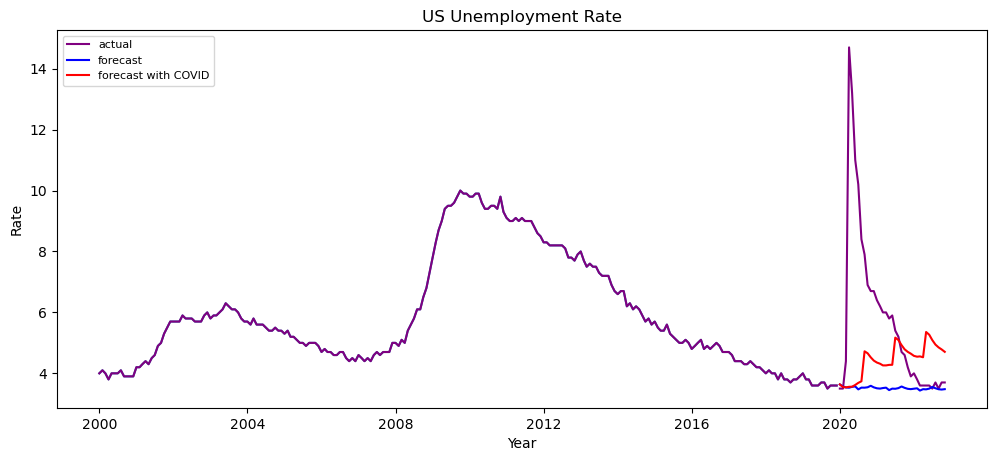

In [123]:
exo_predicted, ci = sxmodel.predict(35, exogenous=labor_market['frbkclmcila'],
                                    return_conf_int=True)

# make series for plotting purpose
exo_predicted.index = test.date
lower_bound = pd.Series(ci[:, 0], index=test.date)
upper_bound = pd.Series(ci[:, 1], index=test.date)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(merged[merged.index.year<2020]['unrate'])
plt.plot(y_train, color='purple', label='actual')
plt.plot(y_test, color='purple')
plt.plot(normal_predicted, color='blue', label='forecast')
plt.plot(exo_predicted, color='red', label='forecast with COVID')
# plt.fill_between(lower_bound.index, 
#                  lower_bound, 
#                  upper_bound, 
#                  color='k', alpha=.15)
plt.title('US Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### finding a covid-impacted variable that correlates with unemployment

In [58]:
# business revenues
business_rev = pd.read_csv('data/TOTBUSSMSA.csv')
business_rev.columns = business_rev.columns.str.lower()
business_rev.loc[:, 'date'] = business_rev.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(business_rev, on='date')
merged.corr()

,unrate,totbussmsa
unrate,1.000000,-0.152365
totbussmsa,-0.152365,1.000000


In [57]:
# federal grants
fed_grants = pd.read_csv('data/BOGZ1FU206403131Q.csv')
fed_grants.columns = fed_grants.columns.str.lower()
fed_grants.loc[:, 'date'] = fed_grants.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(fed_grants, on='date')
merged.corr()

,unrate,bogz1fu206403131q
unrate,1.000000,0.164646
bogz1fu206403131q,0.164646,1.000000


In [56]:
# hire levels
hire_levels = pd.read_csv('data/JTU1000HIL.csv')
hire_levels.columns = hire_levels.columns.str.lower()
hire_levels.loc[:, 'date'] = hire_levels.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(hire_levels, on='date')
merged.corr()

,unrate,jtu1000hil
unrate,1.000000,-0.405973
jtu1000hil,-0.405973,1.000000


In [55]:
# labor market levels
labor_market = pd.read_csv('data/FRBKCLMCILA.csv')
labor_market.columns = labor_market.columns.str.lower()
labor_market.loc[:, 'date'] = labor_market.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(labor_market, on='date')
merged.corr()

,unrate,frbkclmcila
unrate,1.000000,-0.931296
frbkclmcila,-0.931296,1.000000


In [54]:
# gov spending levels
gov_spending = pd.read_csv('data/W068RCQ027SBEA.csv')
gov_spending.columns = gov_spending.columns.str.lower()
gov_spending.loc[:, 'date'] = gov_spending.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(gov_spending, on='date')
merged.corr()

,unrate,w068rcq027sbea
unrate,1.000000,0.189731
w068rcq027sbea,0.189731,1.000000


In [60]:
# inflation
inflation = pd.read_excel('data/inflation.xlsx')
inflation.drop(index=np.arange(0,10,1), inplace=True)
inflation.columns = inflation.loc[10]
inflation.drop([10], inplace=True)
inflation.index = inflation['Year']
inflation.drop(['Year', 'Annual', 'HALF1', 'HALF2'], axis=1, inplace=True)
inflation = inflation.unstack().reset_index()
inflation['date'] = inflation.apply(lambda x: datetime.strptime(x[10] + '-' + str(int(x['Year'])), '%b-%Y'), axis=1)
inflation.loc[:, 0] = inflation.loc[:, 0].apply(lambda x: np.float64(x))
inflation.drop([10, 'Year'], axis=1, inplace=True)
inflation.sort_values('date').reset_index(inplace=True, drop=True)
merged = us_rates.merge(inflation, on='date')
merged.corr()

/Users/jamiepark/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,unrate,0
unrate,1.000000,-0.475304
0,-0.475304,1.000000


In [61]:
# job openings
jobs = pd.read_csv('data/JTSJOL.csv')
jobs.columns = jobs.columns.str.lower()
us_rates['unrate'].corr(jobs['jtsjol'])
jobs.loc[:, 'date'] = jobs.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged = us_rates.merge(jobs, on='date')
merged.corr()

,unrate,jtsjol
unrate,1.000000,-0.539966
jtsjol,-0.539966,1.000000
